# Cole Hoffbauer Report - Project 1
In this report I'm going to talk about my approach to Kaggle's Titanic competition. I'll cover how I chose which features to use, how I formatted those features, and which method of learning I ended up choosing and why. I used some of the kaggle tutorials to get me started as well. My team name on Kaggle is MU-FEM-F2017-05, just like my team name on canvas. 

In [303]:
# imports
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sb

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [304]:
# importing data with pandas
train = pd.read_csv('train.csv')
train_df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_df = pd.read_csv('test.csv')

# Start - Deciding what data is important

I first started by looking at all of the features and how well each of them divided up the survivors and the non-survivors. I used some data visualization and some grouping with just plain numbers to look at the data.

In [305]:
#visualizing relationships of certain features to survival to figure out which are best to use in classification
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Pclass
Pclass was the first feature I looked at. I looked at the percentage of survivors per class and saw a clear trend that showed that the higher your class was, the higher your rate of survival was. 62% of the first class survived, 47% of the second class survived, and only 24% of the lower class survived. This was definitely a feature that I needed to use. 

In [306]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Sex

Sex was the next feature I looked at. It showed a clear trend too. Women were 74% likely to survive whereas men were only 18% likely to survive. Another important feature. 

In [307]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Embarked

Embarked was the next feature I looked at. For some reason passengers that embarked from C were 20% more likely to survive than their counterparts. I figured this was an important enough separation to include it in my final model. 

In [308]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Age

Just numbers wouldn't do for age, there were too many different ages to see a clear trend. I decided to use a seaborn histogram to see the distribution of ages for survivors and non survivors. The graphs show a clear bump in the middle age for non-survivors, and a clear bump in the super young for the survivors. This showed that we could get good information out of this feature, it should be included. 

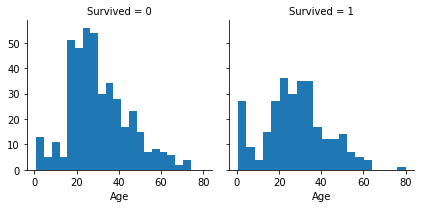

In [309]:
grid = sb.FacetGrid(train, col='Survived')
grid.map(plt.hist, 'Age', bins=20)

### Parch and SibSp

Next I looked at both Parch and SibSp because they were related. Alone they showed a downward trend, but they didn't really show any difference in the trend when comparing survivors and non-survivors. These features didn't seem too useful

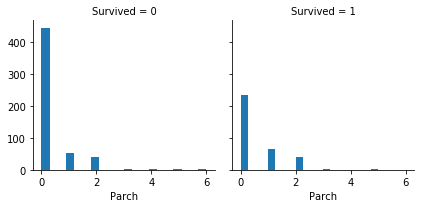

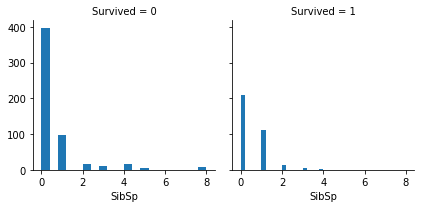

In [310]:
grid = sb.FacetGrid(train_df, col='Survived')
grid.map(plt.hist, 'Parch', bins=20)

grid = sb.FacetGrid(train_df, col='Survived')
grid.map(plt.hist, 'SibSp', bins=20)

### Alone

I decided to try and combine Parch and SibSp to create a new feature called Alone. If alone == 1, then the passenger doesn't have any family aboard, but if alone == 0 they do. This showed some difference: people who were alone were less likely to survive than those that had family on board. I decided to include this feature. (The panda error doesn't affect the output of my code, I checked. That goes for all warnings seen in my code, something was weird with pandas)

In [328]:
# creating a new feature "Alone" to make use of sibsp and parch features. if "alone" == 0, then the passenger doesn't have any family on board
# shows us that people with families were more likely to survive
train['Alone'] = train['SibSp'] + train['Parch']
train_df['Alone'] = train_df['SibSp'] + train_df['Parch']
train['Alone'].loc[train_df['Alone'] > 0] = 0
train['Alone'].loc[train_df['Alone'] == 0] = 1

test['Alone'] = test['SibSp'] + test['Parch']
test_df['Alone'] = test_df['SibSp'] + test_df['Parch']
test['Alone'].loc[test_df['Alone'] > 0] = 0
test['Alone'].loc[test_df['Alone'] == 0] = 1

train[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Alone,Survived
0,0,0.505650
1,1,0.303538


### Finalizing Features
I decided the following features were important:
    - Age
    - Sex
    - Pclass
    - Alone
    - Embarked

And the following features didn't make sense that they would contribute to survival, they are connected to pclass anyway:
    - Cabin
    - Ticket
    
I also dropped sibsp and parch because I captured their value in "Alone"

In [312]:
train_dropped = train.drop(['Ticket','Cabin', 'SibSp', 'Parch'], axis = 1)
test_dropped = test.drop(['Ticket','Cabin', 'SibSp', 'Parch'], axis = 1)
train_dropped.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1


### Name

Initially I dropped name as well, but then thought that maybe a person's title could contribute to survival. I took the actual names away and only kept the titles and made a bunch of pie charts that showed the survival rate of each title. The all blue circles mean either 100% survival or 100% death rate, I couldn't figure out how to get it so the colors correlated to the correct survival. Regardless it was evident that Countess, Lady, Sir, Mlle, Ms, and Mme were good for survival, and stuff like Don, Rev, etc. were not. I decided this feature was important to add. 

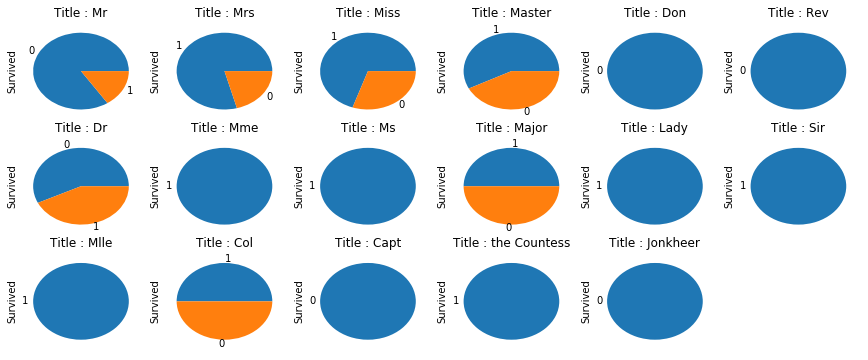

In [313]:
#Extracting title from the name
train_dropped['Name'] = train_dropped['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
test_dropped['Name'] = test_dropped['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = train_dropped['Name'].unique()

fig = plt.figure(figsize=(15,6))

#plotting titles and survival rates for those titles to find which are more likely to survive, clear correlation
i=1
for title in titles:
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    train_dropped.Survived[train_dropped['Name'] == title].value_counts().plot(kind='pie')
    i += 1

## Formatting Data

Next I had to format the features I decided to keep. First off was the title. I needed to convert it to a numeric feature, so I gave high numbers to high survival rate and low numbers to low survival rate and mapped those numbers to the titles. I then reshaped that to be between -1 and 1 so it was normalized. I had to fill in NaNs in the test data, so I made those the equivalent of 'Mr.' because odds are they were a man. 

In [314]:
#Refitting with numbers instead of titles. Higher the number is a higher rate of survival 
replacement = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}

train_dropped['Name'] = train_dropped['Name'].apply(lambda x: replacement.get(x))
test_dropped['Name'] = test_dropped['Name'].apply(lambda x: replacement.get(x))

#resizing to be between -1 and 1
from sklearn.preprocessing import StandardScaler
train_dropped['Name'] = StandardScaler().fit_transform(train_dropped['Name'].values.reshape(-1, 1))

#filling any nans
test_dropped['Name'][np.isnan(test_dropped['Name'])] = 1.0
     
test_dropped['Name'] = StandardScaler().fit_transform(test_dropped['Name'].values.reshape(-1, 1))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Formatting Sex and Embarked

I assigned 1 to females and 0 to males. For embarked I needed to fill in some NaNs so I just filled it in with the most common port, which I think ended up being 'S'. Then I mapped S to 0, C to 1 and Q to 2. I printed a head of the data to see if it looked good so far.

In [315]:
# Making the text categories into numerical data
train_dropped['Sex'] = train_dropped['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_dropped['Sex'] = test_dropped['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

# filling in NAs in embarked to the most common port
most_frequent = train_df.Embarked.dropna().mode()[0]
train_dropped['Embarked'] = train_dropped['Embarked'].fillna(most_frequent)
test_dropped['Embarked'] = test_dropped['Embarked'].fillna(most_frequent)

# then converting Embarked to numbers
train_dropped['Embarked'] = train_dropped['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_dropped['Embarked'] = test_dropped['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_dropped.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,1,0,3,-0.797294,0,22.0,7.2500,0,0
1,2,1,1,1.537975,1,38.0,71.2833,1,0
2,3,1,3,1.070922,1,26.0,7.9250,0,1
3,4,1,1,1.537975,1,35.0,53.1000,0,0
4,5,0,3,-0.797294,0,35.0,8.0500,0,1


### Filling in ages

I needed to fill in the missing ages in the training and test data, so I filled it in with random values from the mean in between the standard deviation. This randomness would have some undesired consequences though, as different results would be produced every time I ran my models. My best result using these random ages was 77.5% and my worst result was 74%. I tried constant values of just the mean and just 0, but none got above 77.5% and both hung around 74% so I didn't see any point in removing the randomness.

In [316]:
# fill in the holes in the age data by generating random ages around the mean bounded by standard dev

mean_age = np.mean(train_dropped['Age'])
dev_age = np.std(train_dropped['Age'])

for i in range(len(train_dropped['Age'])):
    if(np.isnan(train_dropped.Age[i])): train_dropped.Age[i] = np.random.uniform(mean_age-dev_age, mean_age+dev_age)

for i in range(len(test_dropped['Age'])):
    if(np.isnan(test_dropped.Age[i])): test_dropped.Age[i] = np.random.uniform(mean_age-dev_age, mean_age+dev_age)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


### Fare

I decided to keep fare in too, because it was already a numeric value and it gave more emphasis and weight to class. I filled in missing values with the median.

In [317]:
# complete fare feature in test, fill in with median
test_dropped['Fare'].fillna(test_dropped['Fare'].dropna().median(), inplace=True)

# Machine learning part

Now onto the exciting part, actually training the models and seeing which worked best. First I created the training data and tried Naive Bayes

In [318]:
# creating training data
X_train = train_dropped.drop(["Survived", "PassengerId"], axis=1)
Y_train = train_dropped["Survived"]
X_test  = test_dropped.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape
X_test.head()

,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,3,-0.822024,0,34.5,7.8292,2,1
1,3,1.487156,1,47.0,7.0000,0,0
2,2,-0.822024,0,62.0,9.6875,2,1
3,3,-0.822024,0,27.0,8.6625,0,1
4,3,1.487156,1,22.0,12.2875,0,0


## Naive Bayes

Naive Bayes gave me a 74% accuracy when I submitted to Kaggle, but I decided to try some different methods to see if I could do better. 

In [319]:
#trying naive bayes gaussian fit

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = gaussian.score(X_train, Y_train) * 100
acc_gaussian

78.45117845117845

## Decision Tree

Decision Tree actually did a little worse than naive bayes for me, scoring a 73%. The accuracy score in this notebook is not representative of the socres on the test data. I think this was mostly because of the randomness of the ages affecting things. I decided to try random forest next, in order to take advantage of ensemble learning

In [320]:
#trying decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, Y_train)*100
acc_decision_tree

99.102132435465776

## Random Forest

My first try at random forest produced a 77% accuracy, the best yet. Through messing with the number of estimators, I eventually settled at n=100 as the optimal. Anything more or less was giving me a lower score. Eventually I got a 77.5% as my highest score. 

In [324]:
#Trying random forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = random_forest.score(X_train, Y_train) * 100
acc_random_forest

98.98989898989899

## K Nearest Neighbors

I decided to try K nearest neighbors as well, but got a pretty low score of 62% so I went back to random forest.

In [322]:
#K nearest neighbors
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, Y_train) * 100
acc_knn

81.481481481481481

In [325]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)

# Conclusion

I wasn't super happy with my 77% so I went back and messed with the number of estimators and added the title feature. This only managed to bring it up to 77.5%. I worked for a while to get that up too, but couldn't manage to get anything better. If I had more time I would probably play around with adding/removing more features. There might be a better balance that performs better than mine. I would also love to see what kind of accuracy tensorflow could get. 

Overall I'm happy with the 77.5% I got, but definitely think I could've done better. I made many many submissions trying many different tweaks, but couldn't bring it up.